## Stock Market📈 Prediction with Linear Regression

In [1]:
#For Quandl installation in the kernel 
!pip install Quandl

  Stored in directory: /tmp/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import quandl 
from sklearn.linear_model import LinearRegression

In [3]:
quandl.ApiConfig.api_key = ''
stock_data = quandl.get('NSE/TCS', start_date='2018-12-01', end_date='2018-12-31')

print(stock_data)

               Open       ...         Turnover (Lacs)
Date                      ...                        
2018-12-03  1984.00       ...                31868.00
2018-12-04  1983.00       ...                65568.23
2018-12-05  2006.00       ...                50131.23
2018-12-06  1998.00       ...                46373.71
2018-12-07  1985.05       ...                33463.26
2018-12-10  1975.00       ...                39990.73
2018-12-11  1970.00       ...                58636.26
2018-12-12  2001.10       ...                44663.42
2018-12-13  2024.00       ...                74802.38
2018-12-14  1983.00       ...                49094.42
2018-12-17  1999.00       ...                24482.95
2018-12-18  1991.90       ...                35137.11
2018-12-19  1984.80       ...                49198.05
2018-12-20  1953.80       ...                37945.10
2018-12-21  1948.00       ...                71360.52
2018-12-24  1905.80       ...                35878.57
2018-12-26  1921.80       ..

In [4]:
dataset = pd.DataFrame(stock_data)

In [5]:
dataset.head()

dataset.to_csv('TCS.csv')

In [6]:

data = pd.read_csv('TCS.csv')

In [7]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-12-03,1984.00,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2018-12-04,1983.00,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018-12-05,2006.00,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2018-12-06,1998.00,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2018-12-07,1985.05,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [8]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

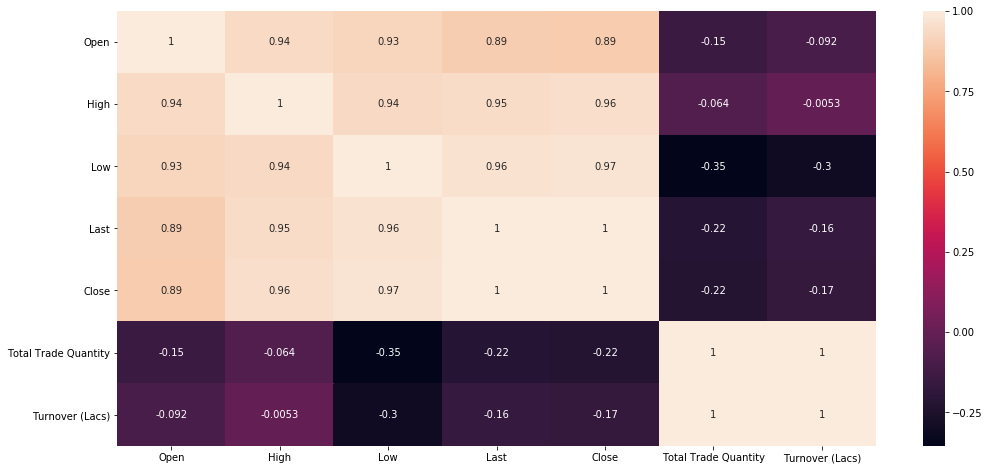

In [9]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [10]:

x = data.loc[:,'High':'Turnover (Lacs)']
y = data.loc[:,'Open']

In [11]:
x.head()

,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [12]:
y.head()

0    1984.00
1    1983.00
2    2006.00
3    1998.00
4    1985.05
Name: Open, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

In [14]:
LR = LinearRegression()

In [15]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
LR.score(x_test,y_test)

0.9997647484047197

In [17]:

Test_data = [[2017.0 ,1979.6 ,1990.00 ,1992.70 ,2321216.0 ,46373.71]]
prediction = LR.predict(Test_data)

In [18]:
print(prediction)

[2001.75159573]
